# The Sparks Foundation - Data Science / Data Analysis Internship

## Task 1 - Prediction using Supervised ML 

## Data link

In [2]:
link = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

## Importing Libraries

In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [ ]:
df = pd.read_csv(link)

In [56]:
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Plotting a scatter plot for data

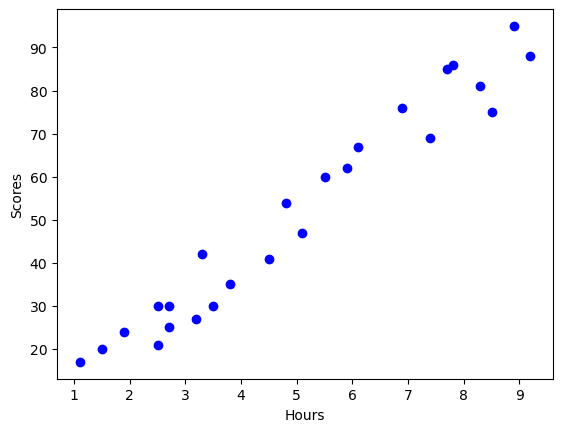

In [9]:
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##  ANALYSIS :
strong correlation + linear relation

## Splitting 80% of the data into train and 20% into test

In [97]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [98]:
msk.sum()

20

In [99]:
train

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
7,5.5,60
8,8.3,81
9,2.7,25
11,5.9,62
12,4.5,41


In [100]:
test

,Hours,Scores
5,1.5,20
6,9.2,88
10,7.7,85
16,2.5,30
23,6.9,76


In [101]:
df.count()

Hours     25
Scores    25
dtype: int64

##  Using sklearn linear regression

In [102]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.80719642]]
Intercept:  [1.58991744]


## Fitting a line in the model

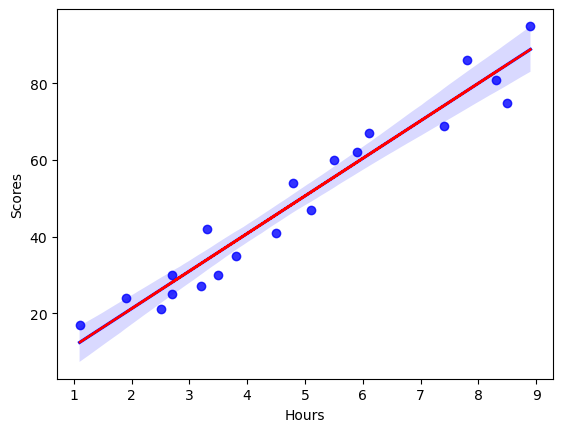

In [121]:
sns.regplot(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [107]:
test_y_

array([[16.30071207],
       [91.81612453],
       [77.1053299 ],
       [26.1079085 ],
       [69.25957276]])

In [108]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Question to answer :
What will be predicted score if a student studies for 9.25 hrs/ day

In [118]:
hours = 9.25
own_pred = regressor.predict (np.array([hours]).reshape(1, 1))

print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating metrics

In [117]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5.21
Residual sum of squares (MSE): 30.23
R2-score: 0.96


### ANALYSIS:
since R2 score is closer to 1, hence it is a good fit

# ----------------------------------------------------------------------------------------------------